<a href="https://colab.research.google.com/github/dsreliete/Womakerscode_DA_colab_desafio_individual/blob/main/DesafioIndividual4ElietedaSilvaRodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

In [154]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode_DA_colab_desafio_individual/main/populacao_brasileira.csv"
df = pd.read_csv(url, index_col=0)

In [155]:
df.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


In [156]:
# 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

# Contar o total de pessoas no dataset
total_pessoas = len(df)
total_avancado = len(df[df['nível de proficiência em inglês'] == 'Avançado'])
prob_fluente = total_avancado / total_pessoas
prob_nao_fluente = (1 - prob_fluente) * 100
print(f'Probabilidade de não ser fluente em inglês é de {prob_nao_fluente:.2f}%')

Probabilidade de não ser fluente em inglês é de 65.60%


In [157]:
# 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

pessoas_para_alagoas = df[(df['estado'] == 'PA') | (df['estado'] == 'AL')]
pessoas_para_alagoas_5k = len(pessoas_para_alagoas[pessoas_para_alagoas['renda'] > 5000])
probabilidade_pessoas_5k = pessoas_para_alagoas_5k / len(pessoas_para_alagoas)
print(f'Probabilidade de uma pessoa do Pará ou Alagoas ter renda superior a 5 mil reais é de {probabilidade_pessoas_5k * 100:.2f}%')

Probabilidade de uma pessoa do Pará ou Alagoas ter renda superior a 5 mil reais é de 5.06%


In [158]:
# 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

pessoas_amazonas = df[df['estado'] == 'AM']
pessoas_amazonas_ensino_superior = pessoas_amazonas[(pessoas_amazonas['escolaridade'] == 'Superior') | (pessoas_amazonas['escolaridade'] == 'Pós-graduação')]
probabilidade_superior_amazonas = len(pessoas_amazonas_ensino_superior) / len(pessoas_amazonas)
print(f'Probabilidade de uma pessoa ser amazonense e ter ensino superior completo é de {probabilidade_superior_amazonas * 100:.2f}%')
probabilidade_5_pessoas = stats.geom.pmf(k=5, p=probabilidade_superior_amazonas)
print(f'Probabilidade da quinta pessoa ser amazonense e ter ensino superior completo é de {probabilidade_5_pessoas * 100:.2f}%')

Probabilidade de uma pessoa ser amazonense e ter ensino superior completo é de 55.26%
Probabilidade da quinta pessoa ser amazonense e ter ensino superior completo é de 2.21%


In [159]:
# 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?


faixas_renda = np.arange(0, df['renda'].max() + 1500, 1500)
contagem_por_faixa, _ = np.histogram(df['renda'], bins=faixas_renda)
maioria_faixa = np.argmax(contagem_por_faixa) * 1500
print('Faixa de renda predominante: ', maioria_faixa, ' - ', maioria_faixa + 1500)

Faixa de renda predominante:  3000  -  4500


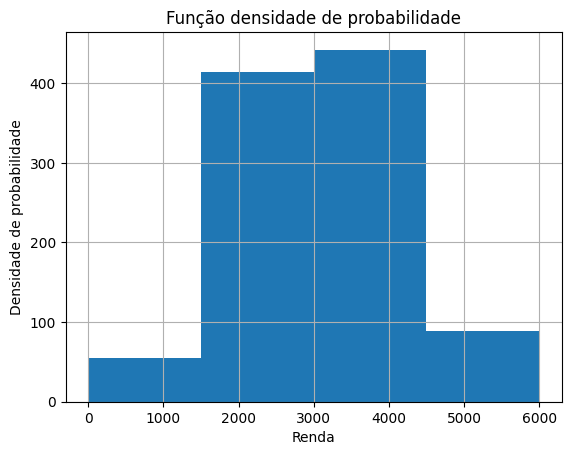

In [160]:
plt.hist(df['renda'], bins=faixas_renda)
plt.title('Função densidade de probabilidade')
plt.xlabel('Renda')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()

In [161]:
# 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

media = df['renda'].mean()
variancia = df['renda'].var()
print(f'Média da renda: {media}')
print(f'Variância da renda: {variancia}')

Média da renda: 3082.5371800000003
Variância da renda: 993156.2281676152


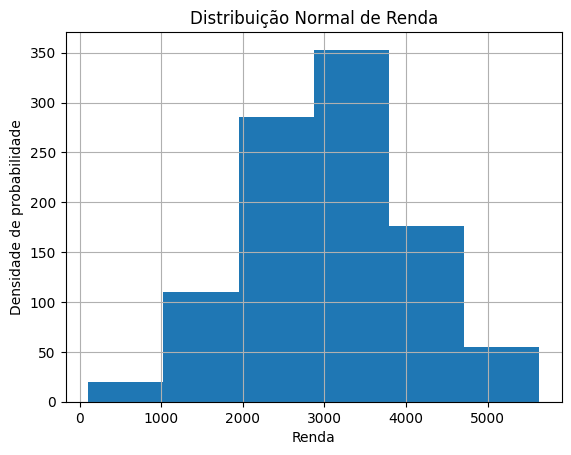

In [162]:
plt.hist(df['renda'], bins=6)
plt.title('Distribuição Normal de Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()

In [163]:
# 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

p_pos_grad = len(df[df['escolaridade'] == 'Pós-graduação']) / len(df)
n = 1000000
k = 243000

probabilidade_pos_grad = stats.binom.pmf(k, n, p_pos_grad)
print(f'Probabilidade de 243 mil pessoas com pós-graduação dentro  da população de 1 milhão é de {probabilidade_pos_grad:}')

Probabilidade de 243 mil pessoas com pós-graduação dentro  da população de 1 milhão é de 1.1104854289794913e-119


In [164]:
# 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [165]:
freq_escolaridade = df['escolaridade'].value_counts()
freq_escolaridade = freq_escolaridade.reset_index()
freq_escolaridade.columns = ['escolaridade', 'frequência']
freq_escolaridade['probabilidade'] = freq_escolaridade['frequência'].apply(lambda x: x) / len(df)
freq_escolaridade['CDF'] = freq_escolaridade['probabilidade'].cumsum()
freq_escolaridade.sort_index(inplace=True)
print(freq_escolaridade)


    escolaridade  frequência  probabilidade    CDF
0    Fundamental         266          0.266  0.266
1  Pós-graduação         253          0.253  0.519
2       Superior         243          0.243  0.762
3          Médio         238          0.238  1.000


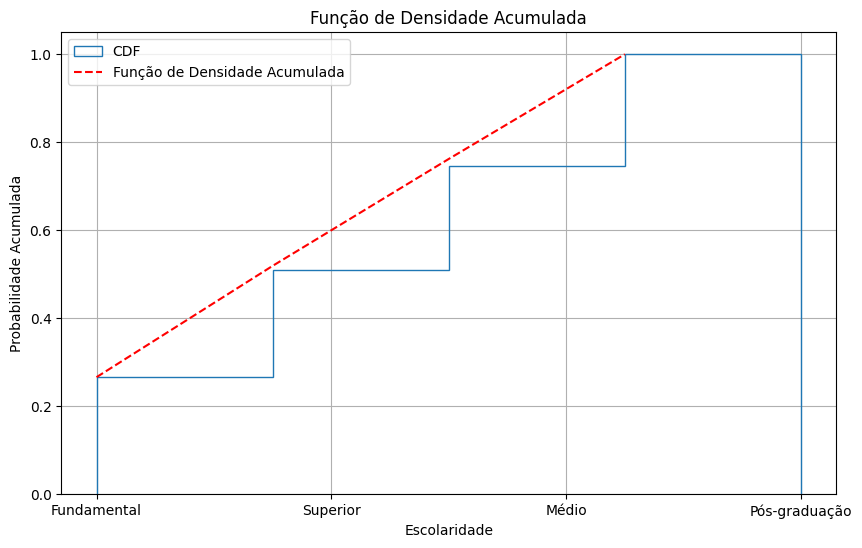

In [166]:
plt.figure(figsize=(10, 6))
count, bins, _ = plt.hist(df['escolaridade'], bins=len(freq_escolaridade), density=True, cumulative=True, histtype='step', label='CDF')
plt.plot(bins[:-1], freq_escolaridade['CDF'], color='red', linestyle='--', label='Função de Densidade Acumulada')
plt.xlabel('Escolaridade')
plt.ylabel('Probabilidade Acumulada')
plt.title('Função de Densidade Acumulada')
plt.legend()
plt.grid(True)
plt.show()

In [167]:
# 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [168]:
total_ingles_intermed = len(df[df['nível de proficiência em inglês'] == 'Intermediário'])
p_ingles_intermed = total_ingles_intermed / len(df)
z = 1.96

erro_amostra = z * np.sqrt((p_ingles_intermed * (1 - p_ingles_intermed)) / len(df))
print(f'A margem de erro amostral é de {erro_amostra * 100:.2f}%')

A margem de erro amostral é de 2.91%


In [169]:
# 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [190]:
renda_media = df['renda'].mean().round(2)
renda_media_1000 = renda_media + 1000

p_media_superior = len(df[df['renda'] > renda_media_1000]) / len(df)
probabilidade_60 = stats.binom.pmf(k=60, n=len(df), p=p_media_superior)
print(f'Probabilidade de encontrarmos 60 pessoas com uma renda mil reais superior à média é de {probabilidade_60 * 100:}')

Probabilidade de encontrarmos 60 pessoas com uma renda mil reais superior à média é de 1.0995205651637739e-20


In [170]:
# 10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [171]:
df_filtrado = df[
    (df['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) &
    (df['sexo'] == 'M') &
    (df['escolaridade'] == 'Fundamental') &
    (df['renda'] > 2000)
]

p_filtrado = len(df_filtrado) / len(df)
print(f'Probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de {p_filtrado * 100:.2f}%')

Probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de 1.90%


In [174]:
p_sudeste = len(df[df['estado'].isin(['SP', 'RJ', 'MG', 'ES'])]) / len(df)
p_homem = len(df[df['sexo'] == 'M']) / len(df)
p_ensino_fundamental = len(df[df['escolaridade'] == 'Fundamental']) / len(df)
p_renda_superior = len(df[df['renda'] > 2000]) / len(df)
p_total = p_sudeste * p_homem * p_ensino_fundamental * p_renda_superior
print(f'Probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de {p_total * 100:.2f}%')

Probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de 1.74%
